## Импорты

In [1]:
from tqdm import tqdm

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
# from lightgbm import LGBMClassifier
# from sklearn.utils.class_weight import compute_class_weight

## Подгрузка и предобработка данных

In [2]:
df_air_quality = pd.read_csv('../air_quality.csv')
print(df_air_quality.shape)

(15697584, 24)


In [3]:
df_air_quality.head()

,date,country,city,latitude,longitude,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,...,uv_index,uv_index_clear_sky,ammonia,methane,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen
0,2020-01-01 00:00:00+00:00,Германия,Берлин,52.52,13.41,24.2,12.6,197.0,NaN,21.3,...,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 01:00:00+00:00,Германия,Берлин,52.52,13.41,29.6,17.0,198.0,NaN,25.3,...,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 02:00:00+00:00,Германия,Берлин,52.52,13.41,57.8,37.2,205.0,NaN,27.5,...,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 03:00:00+00:00,Германия,Берлин,52.52,13.41,50.4,30.8,201.0,NaN,23.5,...,NaN,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 04:00:00+00:00,Германия,Берлин,52.52,13.41,36.2,24.2,199.0,NaN,20.3,...,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_weather = pd.read_csv('../weather_in_cities.csv')
print(df_weather.shape)

(15697584, 10)


In [5]:
df_weather.head()

,date,country,city,latitude,longitude,temperature_2m,apparent_temperature,precipitation,wind_speed_10m,wind_direction_10m
0,2020-01-01 00:00:00+00:00,Германия,Берлин,52.52,13.41,2.1085,-1.317814,0.0,10.308831,282.09473
1,2020-01-01 01:00:00+00:00,Германия,Берлин,52.52,13.41,1.8085,-1.758666,0.0,11.159999,270.00000
2,2020-01-01 02:00:00+00:00,Германия,Берлин,52.52,13.41,1.2085,-2.283353,0.0,10.137692,276.11542
3,2020-01-01 03:00:00+00:00,Германия,Берлин,52.52,13.41,0.3585,-3.139605,0.0,9.422101,276.58185
4,2020-01-01 04:00:00+00:00,Германия,Берлин,52.52,13.41,-0.0415,-3.608093,0.0,9.422101,276.58185


In [6]:
df = pd.merge(
    df_air_quality, 
    df_weather.drop(
        columns=['country', 'city']), 
        on=['date', 'latitude', 'longitude'], how='left'
        )
df.head()

,date,country,city,latitude,longitude,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,...,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,temperature_2m,apparent_temperature,precipitation,wind_speed_10m,wind_direction_10m
0,2020-01-01 00:00:00+00:00,Германия,Берлин,52.52,13.41,24.2,12.6,197.0,NaN,21.3,...,NaN,NaN,NaN,NaN,NaN,2.1085,-1.317814,0.0,10.308831,282.09473
1,2020-01-01 01:00:00+00:00,Германия,Берлин,52.52,13.41,29.6,17.0,198.0,NaN,25.3,...,NaN,NaN,NaN,NaN,NaN,1.8085,-1.758666,0.0,11.159999,270.00000
2,2020-01-01 02:00:00+00:00,Германия,Берлин,52.52,13.41,57.8,37.2,205.0,NaN,27.5,...,NaN,NaN,NaN,NaN,NaN,1.2085,-2.283353,0.0,10.137692,276.11542
3,2020-01-01 03:00:00+00:00,Германия,Берлин,52.52,13.41,50.4,30.8,201.0,NaN,23.5,...,NaN,NaN,NaN,NaN,NaN,0.3585,-3.139605,0.0,9.422101,276.58185
4,2020-01-01 04:00:00+00:00,Германия,Берлин,52.52,13.41,36.2,24.2,199.0,NaN,20.3,...,NaN,NaN,NaN,NaN,NaN,-0.0415,-3.608093,0.0,9.422101,276.58185


In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df = df.rename(columns={
 'pm10'                  : 'PM10',               
 'pm2_5'                 : 'PM2_5',               
 'carbon_monoxide'       : 'CO',     
 'carbon_dioxide'        : 'CO2',      
 'nitrogen_dioxide'      : 'NO2',    
 'sulphur_dioxide'       : 'SO2',    
 'ozone'                 : 'O3',               
 'aerosol_optical_depth' : 'aerosol',              
 'uv_index'              : 'uv',            
 'uv_index_clear_sky'    : 'uv_clear',  
 'ammonia'               : 'NH3',             
 'methane'               : 'CH4',                  
 'temperature_2m'        : 'temperature',      
 'apparent_temperature'  : 'temperature_ap',     
 'wind_speed_10m'        : 'wind_speed',
 'wind_direction_10m'    : 'wind_direction'
})

In [9]:
# Добавление новых категориальных признаков для последующего анализа
df['year'] = df['date'].dt.year      # Год
df['month_n'] = df['date'].dt.month  # Месяц (номер)
df['hour'] = df['date'].dt.hour      # Час

In [10]:
# Добавление ранговых признаков: время года и суток
# Время года
def get_season(month_n):
    if month_n in [12, 1, 2]:
        return 'Зима'
    elif month_n in [3, 4, 5]:
        return 'Весна'
    elif month_n in [6, 7, 8]:
        return 'Лето'
    elif month_n in [9, 10, 11]:
        return 'Осень'

# Время суток
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Утро'
    elif 12 <= hour < 17:
        return 'День'
    elif 17 <= hour < 23:
        return 'Вечер'
    else:
        return 'Ночь'

In [11]:
df['season'] = df['month_n'].apply(get_season)
df['time_of_day'] = df['hour'].apply(get_time_of_day)

In [12]:
# Преобразование месяцев:
month_names = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

# Замена числовых значений месяцев на их названия на русском
df['month'] = df['month_n'].map(month_names)

In [13]:
def eaqi(concentration, pollutant):
    # Справочник табличных значений диапазонов для расчета EAQI
    eaqi_ranges = {
        'PM2_5': [(0, 10, 0, 20), (10, 20, 20, 40), (20, 25, 40, 60), (25, 50, 60, 80), (50, 75, 80, 100), (75, 800, 100, 120)],
        'PM10':  [(0, 20, 0, 20), (20, 40, 20, 40), (40, 50, 40, 60), (50, 100, 60, 80), (100, 150, 80, 100), (150, 1200, 100, 120)],
        'NO2':   [(0, 40, 0, 20), (40, 90, 20, 40), (90, 120, 40, 60), (120, 230, 60, 80), (230, 340, 80, 100), (340, 1000, 100, 120)],
        'O3':    [(0, 50, 0, 20), (50, 100, 20, 40), (100, 130, 40, 60), (130, 240, 60, 80), (240, 380, 80, 100), (380, 800, 100, 120)],
        'SO2':   [(0, 100, 0, 20), (100, 200, 20, 40), (200, 350, 40, 60), (350, 500, 60, 80), (500, 750, 80, 100), (750, 1250, 100, 120)]
    }
    
    for x_min, x_max, y_min, y_max in eaqi_ranges[pollutant]:
        if x_min <= concentration <= x_max:
            EAQI = (y_max - y_min) * (concentration - x_min) / (x_max - x_min) + y_min
            return round(EAQI, 2)

In [14]:
def rolling_average(df, pollutant):
    # Сортируем по городу и дате, чтобы обеспечить правильный порядок
    df = df.sort_values(by=['city', 'date'])

    # Скользящее среднее за последние 24 часа
    df.set_index('date', inplace=True)
    col_name = f"{pollutant}_rolling"
    df[col_name] = df.groupby('city')[pollutant].rolling('24h', closed='left').mean().reset_index(level=0, drop=True).round(2)
    df.reset_index(inplace=True)
    
    return df

In [15]:
def calculate_eaqi_for_df(df):
    pollutants = ['PM2_5', 'PM10', 'NO2', 'O3', 'SO2']
    
    # Рассчитываем скользящее среднее для PM2.5 и PM10
    for pollutant in pollutants:
        if pollutant in ['PM2_5', 'PM10']:
            df = rolling_average(df, pollutant)
            df[f"EAQI_{pollutant}"] = df[f"{pollutant}_rolling"].apply(lambda x: eaqi(x, pollutant) if pd.notna(x) else None)
        else:
            df[f"EAQI_{pollutant}"] = df[pollutant].apply(lambda x: eaqi(x, pollutant) if pd.notna(x) else None)
    
    return df

In [16]:
df = calculate_eaqi_for_df(df)

In [17]:
# Заполним пропуски в первых датах средними значениями (так как нет значений до)
columns_to_fill = ['PM2_5_rolling', 'EAQI_PM2_5', 'PM10_rolling', 'EAQI_PM10']

for col in columns_to_fill:
    df[col] = df.groupby(['country', 'year', 'month_n'])[col].transform(lambda x: x.fillna(x.mean()))

In [18]:
# Определение общего индекса качества воздуха (EAQI)
df['EAQI'] = df.filter(regex='^EAQI_').max(axis=1).round(2)

In [19]:
# Перевод индекса в диапазоны значений
index_list = []
for key, value in df['EAQI'].items():
    if (value >= 0) & (value < 20):
       index_list.append('good') 
    elif (value >= 20) & (value < 40):
       index_list.append('fair')
    elif (value >= 40) & (value < 60):
       index_list.append('moderate') 
    elif (value >= 60) & (value < 80):
       index_list.append('poor')
    elif (value >= 80) & (value < 100):
       index_list.append('very poor')
    elif value >= 100:
       index_list.append('extremely poor')

df['EAQI_category'] = index_list

In [20]:
df = df.drop(['CO2', 'CH4'], axis=1)
df = df.drop(['aerosol', 'uv', 'uv_clear'], axis=1)
df = df[~df['city'].isin(['Аресифе','Ла-Лагуна', 'Арона', 'Лас-Пальмас-де-Гран-Канария', 'Санта-Крус-де-Тенерифе', 'Тельде'])]

In [21]:
df.columns

Index(['date', 'country', 'city', 'latitude', 'longitude', 'PM10', 'PM2_5',
       'CO', 'NO2', 'SO2', 'O3', 'dust', 'NH3', 'alder_pollen', 'birch_pollen',
       'grass_pollen', 'mugwort_pollen', 'olive_pollen', 'ragweed_pollen',
       'temperature', 'temperature_ap', 'precipitation', 'wind_speed',
       'wind_direction', 'year', 'month_n', 'hour', 'season', 'time_of_day',
       'month', 'PM2_5_rolling', 'EAQI_PM2_5', 'PM10_rolling', 'EAQI_PM10',
       'EAQI_NO2', 'EAQI_O3', 'EAQI_SO2', 'EAQI', 'EAQI_category'],
      dtype='object')

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
df.head()

,date,country,city,latitude,longitude,PM10,PM2_5,CO,NO2,SO2,O3,dust,NH3,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,temperature,temperature_ap,precipitation,wind_speed,wind_direction,year,month_n,hour,season,time_of_day,month,PM2_5_rolling,EAQI_PM2_5,PM10_rolling,EAQI_PM10,EAQI_NO2,EAQI_O3,EAQI_SO2,EAQI,EAQI_category
0,2020-01-01 00:00:00+00:00,Испания,Авила,40.66,-4.7,14.100000,10.8,141.0,16.4,1.3,22.0,1.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,7.496,3.416672,0.0,6.287130,246.37060,2020,1,0,Зима,Ночь,Январь,13.171276,27.030485,19.538254,19.718966,8.20,8.8,0.26,27.03,fair
1,2020-01-01 01:00:00+00:00,Испания,Авила,40.66,-4.7,15.800000,10.7,136.0,16.4,2.1,22.0,1.0,0.7,NaN,NaN,NaN,NaN,NaN,NaN,7.796,3.894891,0.0,4.394360,235.00790,2020,1,1,Зима,Ночь,Январь,10.800000,21.600000,14.100000,14.100000,8.20,8.8,0.42,21.60,fair
2,2020-01-01 02:00:00+00:00,Испания,Авила,40.66,-4.7,21.000000,13.1,151.0,16.4,2.6,23.0,1.0,0.6,NaN,NaN,NaN,NaN,NaN,NaN,5.396,1.564715,0.0,4.104631,217.87505,2020,1,2,Зима,Ночь,Январь,10.750000,21.500000,14.950000,14.950000,8.20,9.2,0.52,21.50,fair
3,2020-01-01 03:00:00+00:00,Испания,Авила,40.66,-4.7,19.700001,11.5,155.0,14.0,2.0,23.0,1.0,0.7,NaN,NaN,NaN,NaN,NaN,NaN,3.896,-0.062145,0.0,5.001280,210.25635,2020,1,3,Зима,Ночь,Январь,11.530000,23.060000,16.970000,16.970000,7.00,9.2,0.40,23.06,fair
4,2020-01-01 04:00:00+00:00,Испания,Авила,40.66,-4.7,13.600000,10.2,155.0,12.5,1.9,24.0,1.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2.946,-1.163894,0.0,5.959060,205.01686,2020,1,4,Зима,Ночь,Январь,11.530000,23.060000,17.650000,17.650000,6.25,9.6,0.38,23.06,fair


In [24]:
(df.isna().sum() / df.shape[0]) * 100

date               0.000000
country            0.000000
city               0.000000
latitude           0.000000
longitude          0.000000
PM10               0.000000
PM2_5              0.000000
CO                 0.000000
NO2                0.000000
SO2                0.000000
O3                 0.000000
dust               0.000000
NH3                0.000000
alder_pollen      45.810573
birch_pollen      44.496898
grass_pollen      39.406586
mugwort_pollen    52.871283
olive_pollen      43.128652
ragweed_pollen    39.461321
temperature        0.000000
temperature_ap     0.000000
precipitation      0.000000
wind_speed         0.000000
wind_direction     0.000000
year               0.000000
month_n            0.000000
hour               0.000000
season             0.000000
time_of_day        0.000000
month              0.000000
PM2_5_rolling      0.000000
EAQI_PM2_5         0.000000
PM10_rolling       0.000000
EAQI_PM10          0.000000
EAQI_NO2           0.000000
EAQI_O3            0

## Разбиение на трейн и тест, предоработка

### В данном случае берем за целевую переменную концентрацию загрязняющих веществ

In [25]:
df_features = df[['year', 'season', 'month_n', 'time_of_day', 'country', 'city', 'PM2_5',
                  'temperature', 'precipitation', 'wind_speed', 'wind_direction' 
                  ]].copy()


<Axes: >

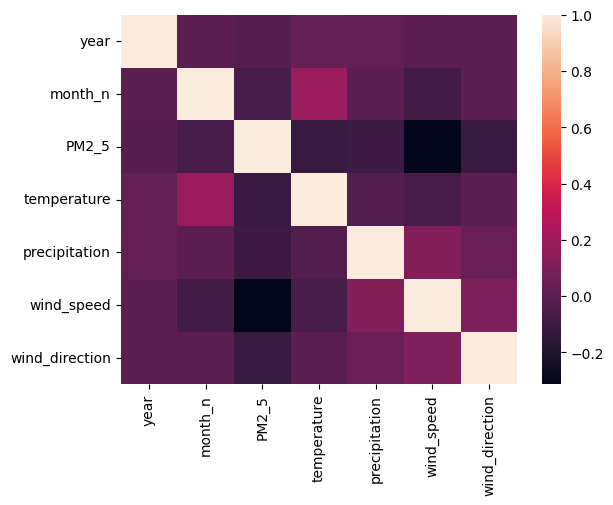

In [26]:
# У целевой переменной высокая корреляция с признаком PM10 -- удалим его из датасета
sns.heatmap(df_features.corr(numeric_only=True))

In [27]:
# Разделение данных по годам
train_data = df_features[df_features['year'] < 2024]  # 2020-2023
test_data = df_features[df_features['year'] == 2024]  # для test берем 2024 год, наиболее актуальные данные, для создания прогноза на будущее 

# Разделение на признаки (X) и целевую переменную (y)
X_train = train_data.drop('PM2_5', axis=1)
y_train = train_data['PM2_5']

X_test = test_data.drop('PM2_5', axis=1)
y_test = test_data['PM2_5']

# Проверка размеров
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (12342528, 10) (12342528,)
Test shape: (3091968, 10) (3091968,)


In [28]:
# Выделяем кат фичи и заменяем текстовые значения с помощью LabelEncoder

cat_cols = ['season', 'time_of_day', 'country', 'city']
for cat_col in tqdm(cat_cols):
    lab = LabelEncoder()
    X_train[cat_col] = lab.fit_transform(X_train[cat_col])
    X_test[cat_col] = lab.transform(X_test[cat_col])

100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # стандартизируем признаки для привидения к единому масштабу
X_test_scaled = scaler.transform(X_test)

### LinearRegression

In [103]:
model = LinearRegression() 
model.fit(X_train_scaled, y_train) # обучаем модель логистической регрессии

LinearRegression()

In [104]:
y_test_pred = model.predict(X_test_scaled) # создаем предсказание тестовых данных и выводим значения метрик
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MAE: 4.2290047485529065
MSE: 34.964340785984746


### BaggingRegressor

In [105]:
model = BaggingRegressor() 
model.fit(X_train_scaled, y_train) # обучаем модель 

BaggingRegressor()

In [106]:
y_test_pred = model.predict(X_test_scaled) # создаем предсказание тестовых данных и выводим значения метрик
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MAE: 4.268703266139841
MSE: 36.85090692481424


### CatBoost

In [29]:
from catboost import CatBoostRegressor

In [34]:
# Разделение данных по годам
train_data = df_features[df_features['year'] < 2024]  # 2020-2023
test_data = df_features[df_features['year'] == 2024]  # для test берем 2024 год, наиболее актуальные данные, для создания прогноза на будущее 

# Разделение на признаки (X) и целевую переменную (y)
X_train = train_data.drop('PM2_5', axis=1)
y_train = train_data['PM2_5']

X_test = test_data.drop('PM2_5', axis=1)
y_test = test_data['PM2_5']

# Проверка размеров
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (12342528, 10) (12342528,)
Test shape: (3091968, 10) (3091968,)


In [33]:
model = CatBoostRegressor(verbose=500, cat_features=cat_cols) 
model.fit(X_train, y_train) # обучаем модель 

Learning rate set to 0.181393
0:	learn: 5.4749343	total: 2.46s	remaining: 40m 58s
500:	learn: 4.1909692	total: 18m 10s	remaining: 18m 5s
999:	learn: 4.0940415	total: 38m 50s	remaining: 0us


In [35]:
y_test_pred = model.predict(X_test) # создаем предсказание тестовых данных и выводим значения метрик
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MAE: 3.7900324927367
MSE: 29.106355081885823


### Подбор гиперпараметров

In [44]:
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def objective(trial, X, y):
    # Разделение данных на тренировочную и валидационную выборки
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Определение гиперпараметров для оптимизации
    params = {
        'iterations': trial.suggest_int('iterations', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'depth': trial.suggest_int('depth', 2, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0, log=True),
        'verbose': False,
        'cat_features': cat_cols
    }
    
    # Инициализация и обучение модели
    model = CatBoostRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        early_stopping_rounds=100,
        verbose=0
    )
    # Прогноз на валидационной выборке
    y_pred = model.predict(X_val)
    # Расчет метрики MAE
    mae = mean_absolute_error(y_val, y_pred)
    
    return mae

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=20)
trial = study.best_trial

In [32]:
best_params = {}

In [33]:
# Обучение финальной модели с лучшими параметрами
# best_params = trial.params
final_model = CatBoostRegressor(verbose=500, cat_features=cat_cols, **best_params)
final_model.fit(X_train, y_train)

Learning rate set to 0.181393
0:	learn: 5.4749343	total: 2.44s	remaining: 40m 33s
500:	learn: 4.1909692	total: 19m 34s	remaining: 19m 30s
999:	learn: 4.0940415	total: 36m 3s	remaining: 0us


In [35]:
y_test_pred = final_model.predict(X_test) # создаем предсказание тестовых данных и выводим значения метрик
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MAE: 3.7900324927367
MSE: 29.106355081885823


### Интерпретация признаков

In [36]:
# Собираем список важности признаков и их названия
feature_imps = zip(final_model.get_feature_importance(), final_model.feature_names_)
# Сортируем по важности от большего к меньшему
feature_imps = np.array(sorted(feature_imps, key=lambda x: x[0], reverse=True))

# Собираем списки отсортированных важностей признаков и их названий
sorted_feature_values = feature_imps[:, 0].astype(float)
sorted_feature_names = feature_imps[:, 1]

/var/folders/n_/s25g12xn1tq3fkgl3pq4s75h0000gn/T/ipykernel_89930/719431690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sorted_feature_names, x=sorted_feature_values, palette='rocket', orient='h')


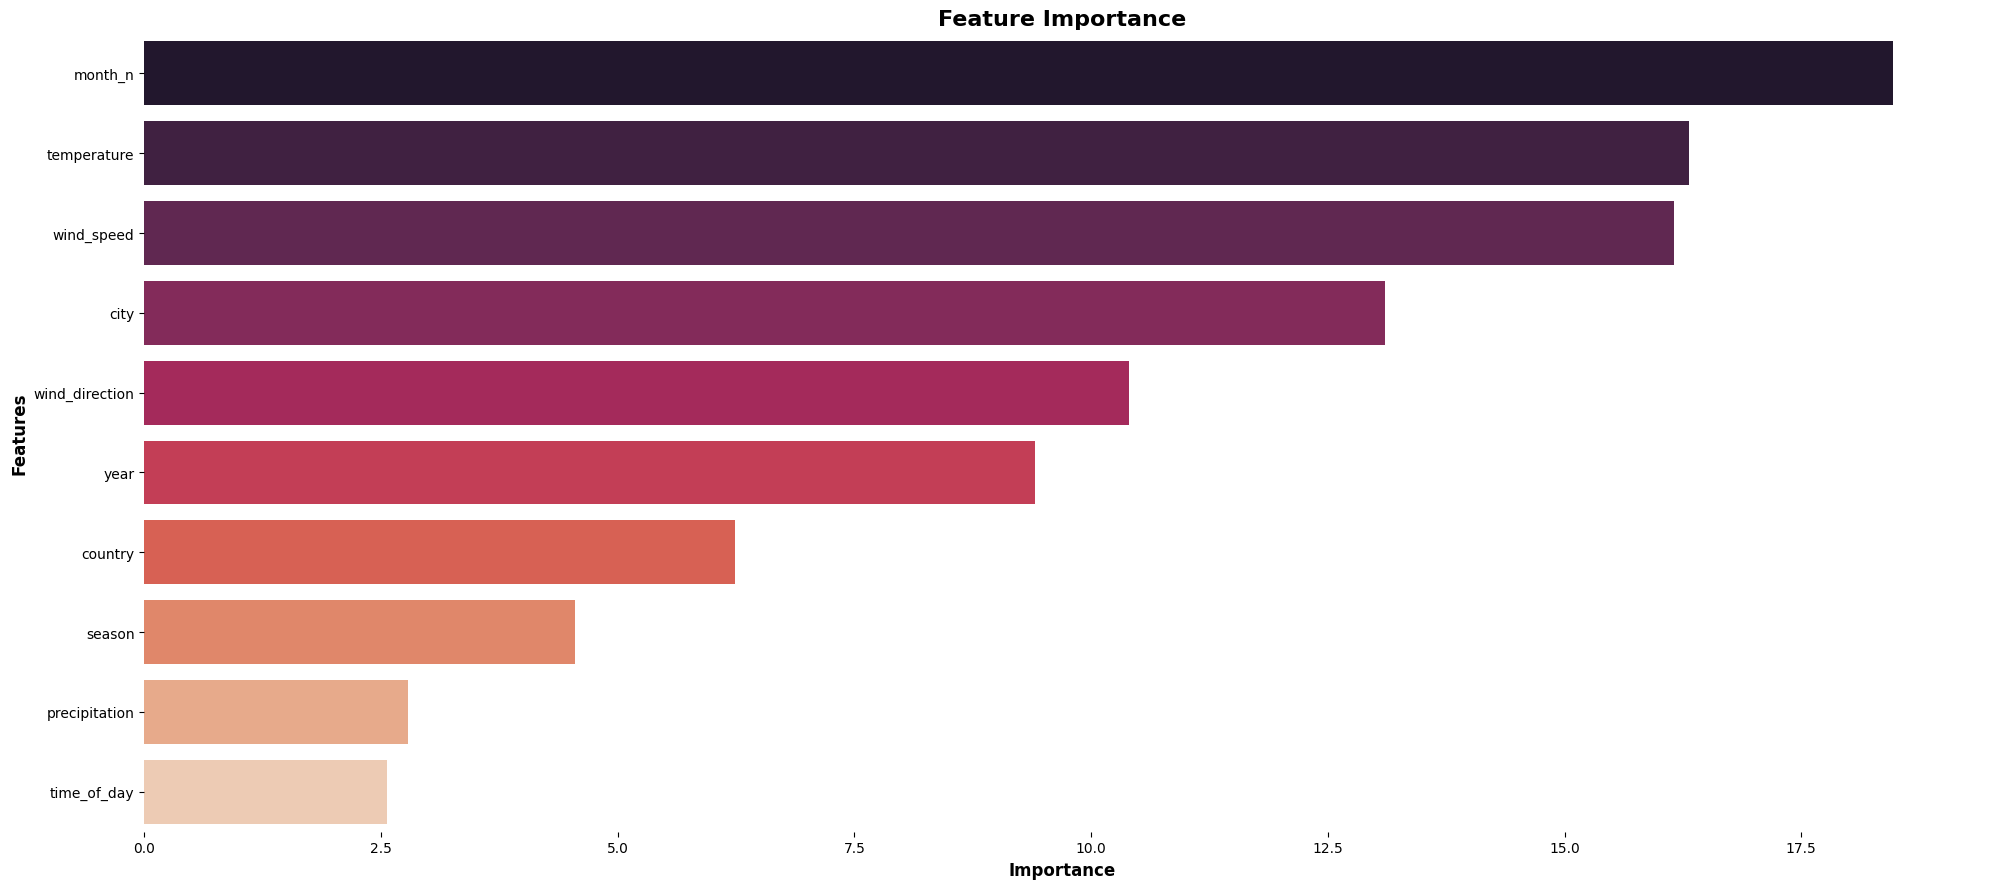

In [37]:
plt.figure(figsize=(20, 9))
sns.barplot(y=sorted_feature_names, x=sorted_feature_values, palette='rocket', orient='h')
plt.title('Feature Importance', fontweight='bold', fontsize=16)
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.ylabel('Features', fontweight='bold', fontsize=12)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()